### Polish parliamentary elections 2019

I'm going to create some visualisations for the Polish parliamentary elections that happened on October 13th, 2019.

Data source: https://sejmsenat2019.pkw.gov.pl/sejmsenat2019/pl/dane_w_arkuszach

### Importing the packages

In [3]:
import pandas
import geopandas
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML

### Loading the data

In [101]:
df = pandas.read_csv("..\\data\\wyniki_gl_na_listy_po_powiatach_proc_sejm.csv", delimiter=";", decimal=",")
df.head()

,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,W tym z powodu postawienia znaku „X” obok nazwiska dwóch lub większej liczby kandydatów z różnych list,W tym z powodu niepostawienia znaku „X” obok nazwiska żadnego kandydata,W tym z powodu postawienia znaku „X” wyłącznie obok nazwiska kandydata na liście której rejestracja została unieważniona,% głosów ważnych,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19,KOMITET WYBORCZY AKCJA ZAWIEDZIONYCH EMERYTÓW RENCISTÓW - ZPOW-601-21/19,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19,KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19,KOMITET WYBORCZY PRAWICA - ZPOW-601-20/19,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19,KOMITET WYBORCZY SKUTECZNI PIOTRA LIROYA-MARCA - ZPOW-601-17/19,KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19,KOMITET WYBORCZY WYBORCÓW KOALICJA BEZPARTYJNI I SAMORZĄDOWCY - ZPOW-601-10/19,KOMITET WYBORCZY WYBORCÓW MNIEJSZOŚĆ NIEMIECKA - ZPOW-601-15/19
0,20100,bolesławiecki,dolnośląskie,55.87,1.53,58.81,41.19,0.0,98.47,20.52,NaN,6.73,7.21,NaN,42.44,NaN,17.67,5.43,NaN
1,20200,dzierżoniowski,dolnośląskie,55.40,1.36,66.89,33.11,0.0,98.64,26.51,NaN,5.64,10.52,NaN,43.61,NaN,11.17,2.54,NaN
2,20300,głogowski,dolnośląskie,60.26,1.10,66.15,33.85,0.0,98.90,26.16,NaN,5.29,5.07,NaN,44.28,NaN,16.69,2.51,NaN
3,20400,górowski,dolnośląskie,50.39,1.58,67.28,32.72,0.0,98.42,22.58,NaN,5.56,8.09,NaN,48.83,NaN,11.26,3.68,NaN
4,20500,jaworski,dolnośląskie,54.96,1.55,74.19,25.81,0.0,98.45,21.40,NaN,5.39,10.22,NaN,47.98,NaN,13.26,1.74,NaN


Dropping unnecessary columns.

In [102]:
df = df.drop(df.columns[[5, 6, 7, 10, 13, 15, 17, 18]], axis=1)
df.head()

,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19,KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19,KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19,KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19,KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19
0,20100,bolesławiecki,dolnośląskie,55.87,1.53,98.47,20.52,6.73,7.21,42.44,17.67
1,20200,dzierżoniowski,dolnośląskie,55.40,1.36,98.64,26.51,5.64,10.52,43.61,11.17
2,20300,głogowski,dolnośląskie,60.26,1.10,98.90,26.16,5.29,5.07,44.28,16.69
3,20400,górowski,dolnośląskie,50.39,1.58,98.42,22.58,5.56,8.09,48.83,11.26
4,20500,jaworski,dolnośląskie,54.96,1.55,98.45,21.40,5.39,10.22,47.98,13.26


Renaming some columns for clarity.

In [95]:
df=df.rename(columns={"KOALICYJNY KOMITET WYBORCZY KOALICJA OBYWATELSKA PO .N IPL ZIELONI - ZPOW-601-6/19": "KO",
                      "KOMITET WYBORCZY KONFEDERACJA WOLNOŚĆ I NIEPODLEGŁOŚĆ - ZPOW-601-5/19": "Konfederacja", 
                     "KOMITET WYBORCZY POLSKIE STRONNICTWO LUDOWE - ZPOW-601-19/19": "PSL", 
                     "KOMITET WYBORCZY PRAWO I SPRAWIEDLIWOŚĆ - ZPOW-601-9/19": "PIS", 
                     "KOMITET WYBORCZY SOJUSZ LEWICY DEMOKRATYCZNEJ - ZPOW-601-1/19": "Lewica", })
df.head()

,Kod TERYT,Powiat,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,KO,Konfederacja,PSL,PIS,Lewica
0,20100,bolesławiecki,dolnośląskie,55.87,1.53,98.47,20.52,6.73,7.21,42.44,17.67
1,20200,dzierżoniowski,dolnośląskie,55.40,1.36,98.64,26.51,5.64,10.52,43.61,11.17
2,20300,głogowski,dolnośląskie,60.26,1.10,98.90,26.16,5.29,5.07,44.28,16.69
3,20400,górowski,dolnośląskie,50.39,1.58,98.42,22.58,5.56,8.09,48.83,11.26
4,20500,jaworski,dolnośląskie,54.96,1.55,98.45,21.40,5.39,10.22,47.98,13.26


### Loading the geodata

In [96]:
powiat_df = geopandas.read_file(r"..\\visualisation\\subdivision shapes\\Powiaty\\Powiaty.shp", encoding="utf-8")
woj_df = geopandas.read_file(r"..\\visualisation\\subdivision shapes\\Wojewodztwa\\Województwa.shp", encoding="utf-8")

In [98]:
powiat_df.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,POW,1815,powiat ropczycko-sędziszowski,NaN,13415,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1815,NaN,NaN,UZG,0,829084,NaN,1.776163,0.068825,"POLYGON ((21.69429 50.17849, 21.69440 50.17849..."
1,POW,1410,powiat łosicki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1410,NaN,NaN,UZG,0,829095,NaN,2.220227,0.101595,"POLYGON ((22.72381 52.28039, 22.72379 52.28043..."
2,POW,1418,powiat piaseczyński,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1418,NaN,NaN,UZG,0,829103,NaN,1.947858,0.081285,"POLYGON ((21.11010 52.11317, 21.10875 52.11459..."
3,POW,1425,powiat radomski,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1425,NaN,NaN,UZG,0,829110,NaN,4.427170,0.197463,"POLYGON ((20.98915 51.48947, 20.98919 51.48942..."
4,POW,1427,powiat sierpecki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1427,NaN,NaN,UZG,0,829112,NaN,2.138918,0.113594,"POLYGON ((19.50876 52.86784, 19.50873 52.86795..."


Modyfing the geodata JPT_KOD_JE to conform to teritorial code.

In [100]:
powiat_df["JPT_KOD_JE"] = powiat_df["JPT_KOD_JE"] + "00"
powiat_df.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,...,JPT_KJ_I_1,JPT_KJ_I_2,JPT_OPIS,JPT_SPS_KO,ID_BUFOR_1,JPT_ID,JPT_KJ_I_3,Shape_Leng,Shape_Area,geometry
0,POW,181500,powiat ropczycko-sędziszowski,NaN,13415,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1815,NaN,NaN,UZG,0,829084,NaN,1.776163,0.068825,"POLYGON ((21.69429 50.17849, 21.69440 50.17849..."
1,POW,141000,powiat łosicki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1410,NaN,NaN,UZG,0,829095,NaN,2.220227,0.101595,"POLYGON ((22.72381 52.28039, 22.72379 52.28043..."
2,POW,141800,powiat piaseczyński,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1418,NaN,NaN,UZG,0,829103,NaN,1.947858,0.081285,"POLYGON ((21.11010 52.11317, 21.10875 52.11459..."
3,POW,142500,powiat radomski,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1425,NaN,NaN,UZG,0,829110,NaN,4.427170,0.197463,"POLYGON ((20.98915 51.48947, 20.98919 51.48942..."
4,POW,142700,powiat sierpecki,NaN,13409,2012-09-26,NaN,2012-09-26,NaN,NaN,...,1427,NaN,NaN,UZG,0,829112,NaN,2.138918,0.113594,"POLYGON ((19.50876 52.86784, 19.50873 52.86795..."


Merging the geodata with the df containing the result of the elections.

In [45]:
merged_df = powiat_df.set_index("JPT_KOD_JE").join(df.set_index("Kod TERYT"))
merged_df.head()

,JPT_SJR_KO,JPT_KOD_JE,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,WAZNY_DO,JPT_KOD__1,JPT_NAZWA1,...,geometry,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,KO,Konfederacja,PSL,PIS,Lewica
JPT_NAZWA_,,,,,,,,,,,,,,,,,,,,,
Biała Podlaska,POW,0661,NaN,13411,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,"POLYGON ((23.12235 51.99639, 23.12047 51.99716...",lubelskie,61.67,0.64,99.36,32.31,6.69,5.76,48.13,6.12
Białystok,POW,2061,NaN,13418,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,"POLYGON ((23.21310 53.06660, 23.21291 53.06722...",podlaskie,65.72,0.62,99.38,30.29,8.43,5.22,40.30,13.99
Bielsko-Biała,POW,2461,NaN,13421,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,"POLYGON ((18.98639 49.73668, 18.98560 49.73674...",śląskie,67.50,0.68,99.32,34.40,7.26,5.28,39.35,13.71
Bydgoszcz,POW,0461,NaN,13424,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,"POLYGON ((18.03976 53.05011, 18.03984 53.05050...",kujawsko-pomorskie,66.77,0.65,99.35,34.74,7.46,5.52,31.94,19.23
Bytom,POW,2462,NaN,13421,2012-09-26,NaN,2012-09-26,NaN,NaN,NaN,...,"POLYGON ((18.94697 50.31671, 18.94656 50.31680...",śląskie,56.45,1.17,98.83,29.20,6.89,5.80,39.00,15.60


### Visualisation

#### Voter turnout

A list of 3 subdivisions with the highest voter turnout.

In [46]:
display(HTML(df.nlargest(3, "Frekwencja").to_html(columns=['Województwo', 'Powiat', 'Frekwencja'], index=False)))

Województwo,Powiat,Frekwencja
mazowieckie,statki,99.43
mazowieckie,zagranica,90.38
mazowieckie,Warszawa,77.07


Removing the votes cast on ships and abroad from the dataset.

In [47]:
df = df[df.Frekwencja < 80]
display(HTML(df.nlargest(3, "Frekwencja").to_html(columns=['Województwo', 'Powiat', 'Frekwencja'], index=False)))

Województwo,Powiat,Frekwencja
mazowieckie,Warszawa,77.07
pomorskie,Sopot,74.32
mazowieckie,pruszkowski,74.27


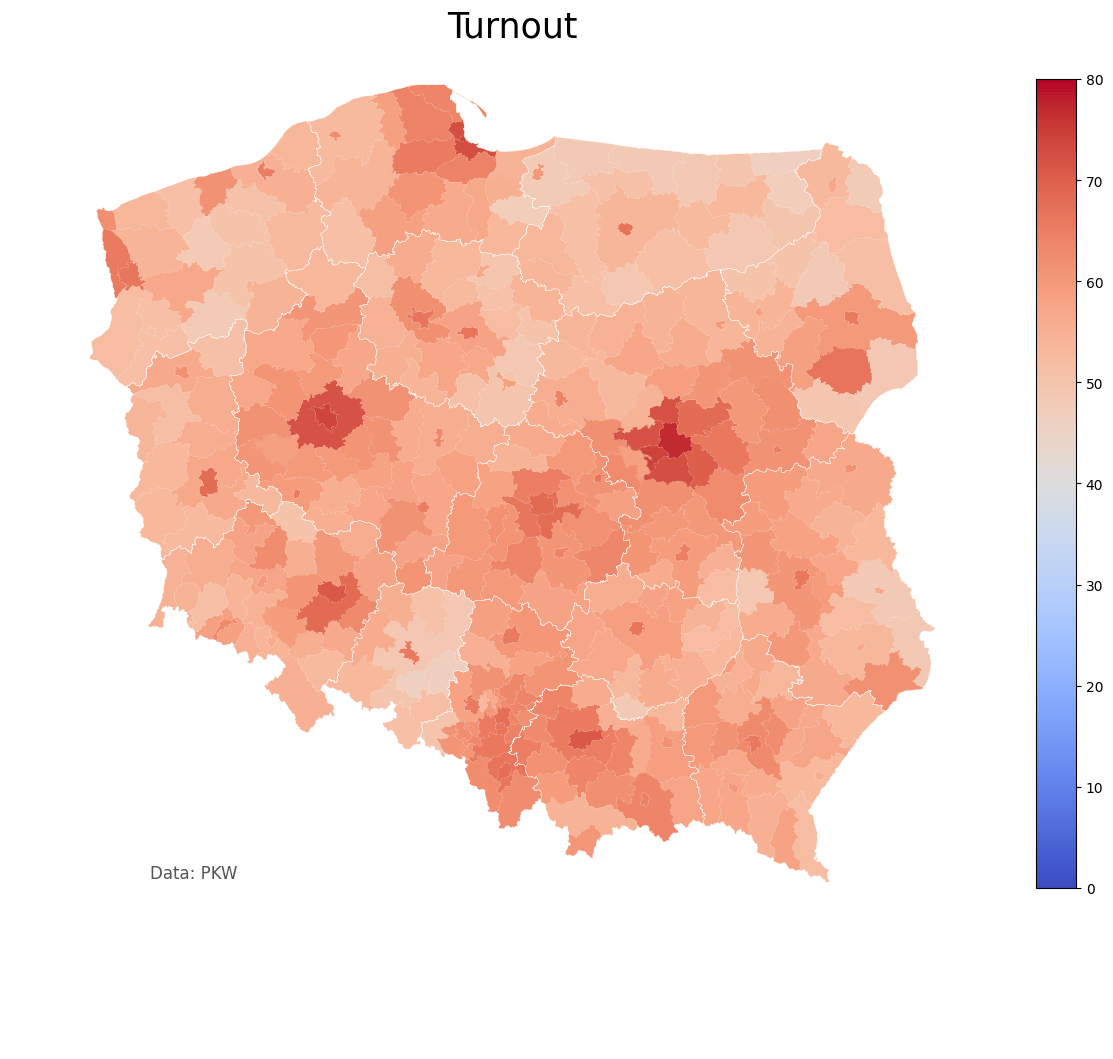

In [48]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Turnout", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
turnout_vmax = float(df['Frekwencja'].max())
scalarmappable = plt.cm.ScalarMappable(cmap="coolwarm",
                           norm=plt.Normalize(vmin=0,vmax=80))
cbar = fig.colorbar(scalarmappable, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Frekwencja", cmap="coolwarm", linewidth=0.1, ax=ax, vmin=0, vmax=80);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Turnout", dpi=200, bbox_inches='tight')

#### Invalid ballots

In [50]:
display(HTML(df.nlargest(3, "% głosów nieważnych").to_html(columns=['Województwo', 'Powiat', '% głosów nieważnych'], index=False)))

Województwo,Powiat,% głosów nieważnych
zachodniopomorskie,choszczeński,2.45
kujawsko-pomorskie,lipnowski,2.40
pomorskie,sztumski,2.37


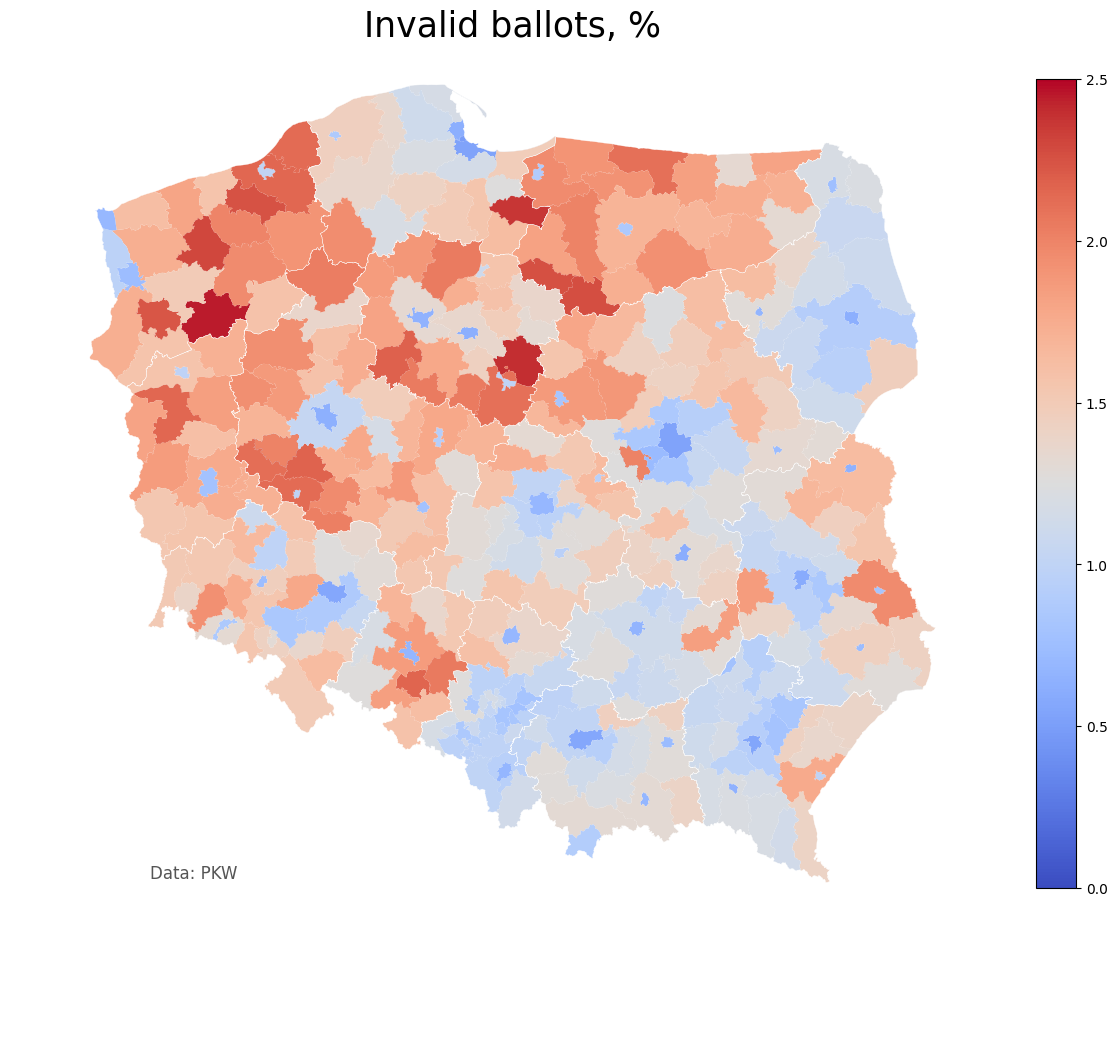

In [55]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Invalid ballots, %", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="coolwarm",
                           norm=plt.Normalize(vmin=0,vmax=2.5))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="% głosów nieważnych", cmap="coolwarm", linewidth=0.1, ax=ax, vmin=0, vmax=2.5);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Invalid ballots", dpi=200, bbox_inches='tight')

#### Election lists

In [57]:
display(HTML(df.nlargest(3, "KO").to_html(columns=['Województwo', 'Powiat', 'KO'], index=False)))

Województwo,Powiat,KO
pomorskie,Sopot,50.11
pomorskie,Gdańsk,47.99
wielkopolskie,Poznań,46.34


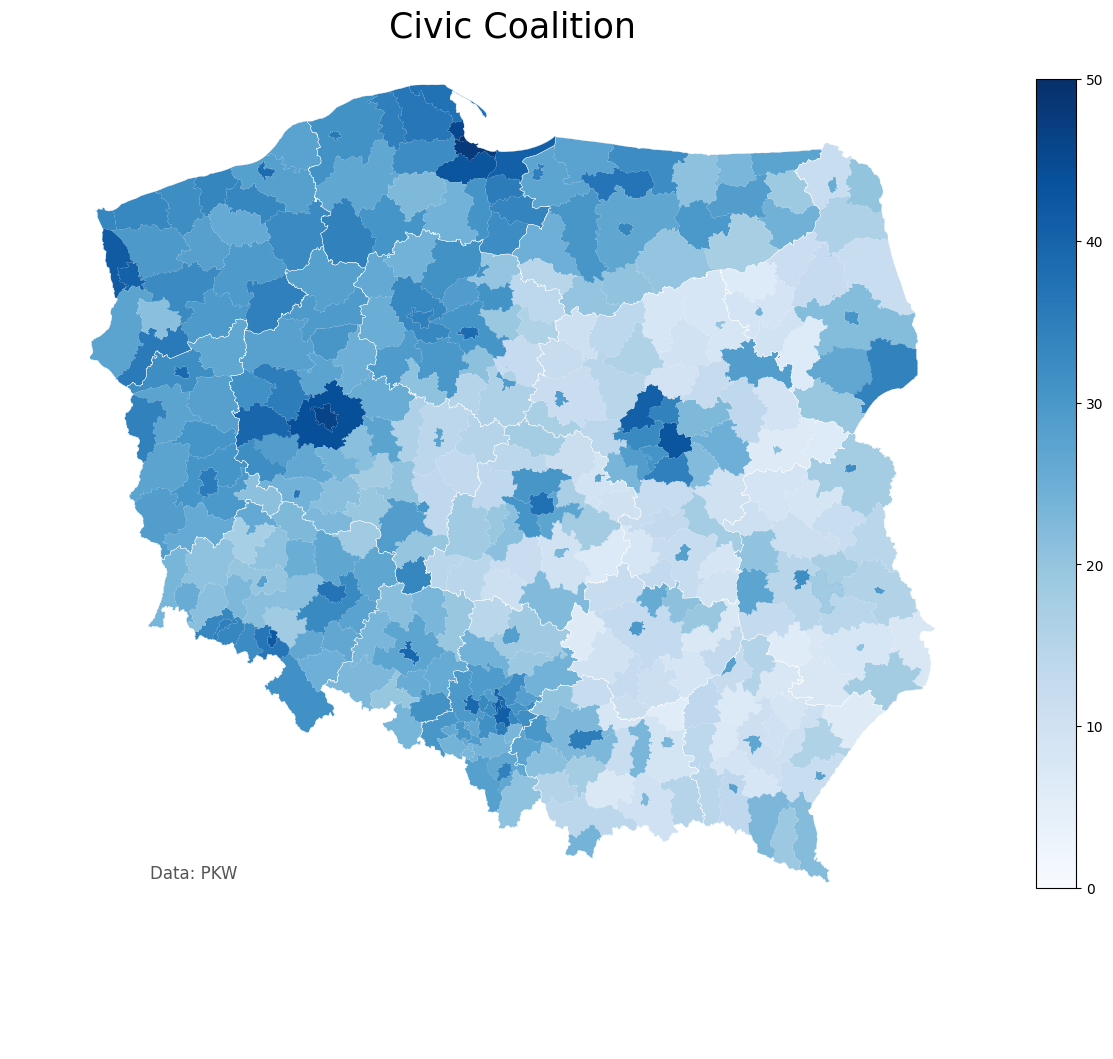

In [59]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Civic Coalition", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Blues",
                           norm=plt.Normalize(vmin=0,vmax=50))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="KO", cmap="Blues", linewidth=0.1, ax=ax, vmin=0, vmax=50);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Civic Coalition", dpi=200, bbox_inches='tight')

In [62]:
display(HTML(df.nlargest(3, "Konfederacja").to_html(columns=['Województwo', 'Powiat', 'Konfederacja'], index=False)))

Województwo,Powiat,Konfederacja
wielkopolskie,średzki,14.20
łódzkie,bełchatowski,10.00
wielkopolskie,gostyński,9.96


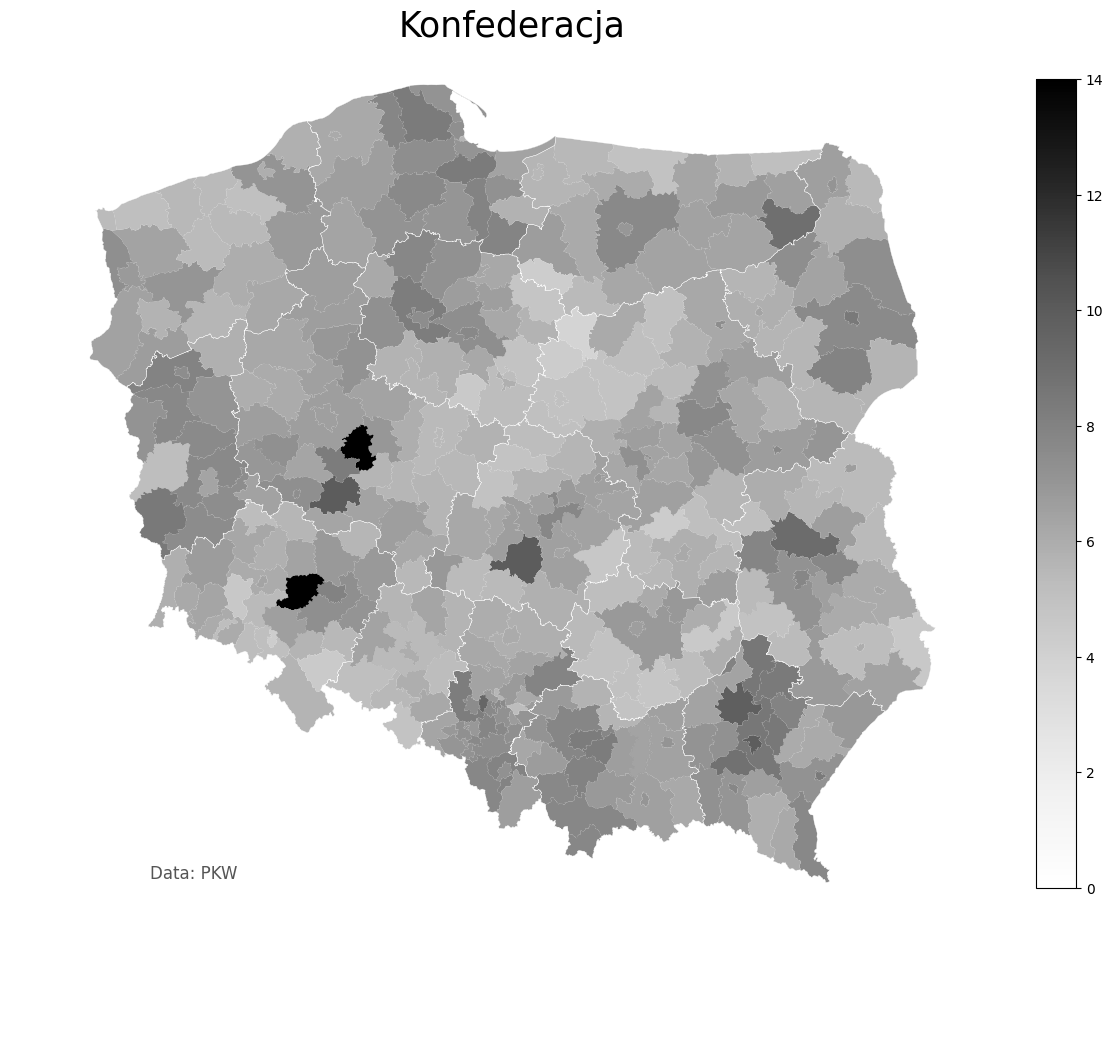

In [68]:
fig, ax = plt.subplots(1, figsize=(15, 15))
ax.set_title("Konfederacja", fontdict={"fontsize": "25", "fontweight" : "3"})
ax.annotate("Data: PKW", xy=(0.1, .13),
            xycoords="figure fraction",
            horizontalalignment="left",
            verticalalignment="top",
            fontsize=12,
            color="#555555")
sm = plt.cm.ScalarMappable(cmap="Greys",
                           norm=plt.Normalize(vmin=0,vmax=14))
cbar = fig.colorbar(sm, shrink=.7, ax=fig.gca())
ax.axis("off")
merged_df.plot(column="Konfederacja", cmap="Greys", linewidth=.1, ax=ax, vmin=0, vmax=14);
woj_df.geometry.boundary.plot(ax=ax, color="white", linewidth=.25);
plt.savefig("Bosak 1st round", dpi=200, bbox_inches='tight')

In [64]:
df.loc[(df.Województwo == "dolnośląskie")]

,Powiat,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,KO,Konfederacja,PSL,PIS,Lewica
0,bolesławiecki,dolnośląskie,55.87,1.53,98.47,20.52,6.73,7.21,42.44,17.67
1,dzierżoniowski,dolnośląskie,55.40,1.36,98.64,26.51,5.64,10.52,43.61,11.17
2,głogowski,dolnośląskie,60.26,1.10,98.90,26.16,5.29,5.07,44.28,16.69
3,górowski,dolnośląskie,50.39,1.58,98.42,22.58,5.56,8.09,48.83,11.26
4,jaworski,dolnośląskie,54.96,1.55,98.45,21.40,5.39,10.22,47.98,13.26
5,jeleniogórski,dolnośląskie,58.64,1.32,98.68,33.48,6.06,7.67,31.64,19.41
6,kamiennogórski,dolnośląskie,55.19,1.55,98.45,32.24,5.29,4.72,41.22,14.90
7,kłodzki,dolnośląskie,55.02,1.50,98.50,31.25,5.64,7.86,41.34,11.63
8,legnicki,dolnośląskie,57.62,1.46,98.54,19.79,6.03,10.77,48.20,11.90
9,lubański,dolnośląskie,54.45,1.39,98.61,25.52,6.14,7.88,39.76,18.11


In [65]:
df.loc[(df.Województwo == "wielkopolskie") & (df.Powiat == "średzki")]

,Powiat,Województwo,Frekwencja,% głosów nieważnych,% głosów ważnych,KO,Konfederacja,PSL,PIS,Lewica
350,średzki,wielkopolskie,61.09,1.78,98.22,21.11,14.2,11.44,38.02,14.4
